# Capstone Data Story

The HAM10000 dataset does not have a lot of tabular data. In the metadata file, which is our only source of tabular data, there exists only one column of numerical data ("age"). Nevertheless, we can draw some interesting insights by looking at the data's distribution and correlation with the categorical variables. 

Below, you can find a summary of the .csv file and the "age" column in that file.

In [1]:
#Importing necessary modules.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A look at the tabular data

In [2]:
#First ten rows of the data
data = pd.read_csv(r'C:\Users\songs\Desktop\CSV files\dataverse_files\HAM10000_metadata.csv')
data.head(10)

,Unnamed: 0,lesion_id,image_id,dx,dx_type,age,sex,localization
0,0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


According to the website where the data was found, the columns are as follows:
* **lesion_id** - Lesion ID (identification code for the skin condition, may or may not be unique for every picture as multiple pictures may be taken for the same condition)
* **image_id** - Image ID (identification code for the image itself, is unique for every picture)
* **dx** - Diagnosis of the skin condition
* **dx_type** - How the Diagnosis was made (histology, confocal viewing, at a follow-up, or by consensus)
* **age** - Age of the patient
* **sex** - Sex of the patient
* **localization** - Where the skin condition was found

We can see from the above table that "age" is the only numerical column, but we confirm it using the info() method.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
Unnamed: 0      10015 non-null int64
lesion_id       10015 non-null object
image_id        10015 non-null object
dx              10015 non-null object
dx_type         10015 non-null object
age             10015 non-null float64
sex             10015 non-null object
localization    10015 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 626.0+ KB


### Distribution of the age column

First, I used the .describe() method on the "age" column to look at its mean and standard deviation. After gathering this information, I plotted a box-and-whiskers plot to look for any outliers and a histogram to better visualize the data's distribution.

In [4]:
#A look at the "age" column
age = data['age']
age.describe()

count    10015.000000
mean        51.824727
std         16.940071
min          0.000000
25%         40.000000
50%         50.000000
75%         65.000000
max         85.000000
Name: age, dtype: float64

The mean age of the patients included was around 52, slightly older than the median age of 50, and the column has a standard deviation of approximately 17 years. The oldest patient was 85 years old, and the youngest was a newborn.

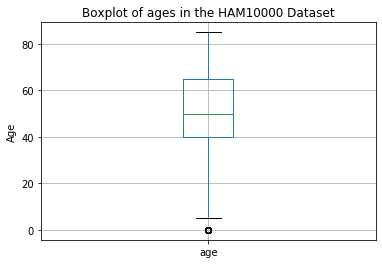

In [5]:
#Box-and-whiskers plot
data.boxplot(column='age')
plt.title('Boxplot of ages in the HAM10000 Dataset')
plt.ylabel('Age')
plt.show()

There exists one outlier at 0 years, which I decided to keep after examining the data points: There are 39 values where the patient age is 0, and the diagnoses are either "nv" (nevi, or a mole/birthmark), "vasc" (vascular lesion, or a bruise), or "bkl" (benign keratosis-like lesions), none of which are cancerous. This information could be useful, and doesn't need to be dropped.

In [6]:
data[data.age == 0]

,Unnamed: 0,lesion_id,image_id,dx,dx_type,age,sex,localization
117,117,HAM_0007179,ISIC_0025906,bkl,histo,0.0,female,back
118,118,HAM_0007179,ISIC_0027151,bkl,histo,0.0,female,back
865,865,HAM_0006186,ISIC_0029320,bkl,consensus,0.0,male,lower extremity
866,866,HAM_0006186,ISIC_0029427,bkl,consensus,0.0,male,lower extremity
902,902,HAM_0004543,ISIC_0032170,bkl,consensus,0.0,female,back
2388,2388,HAM_0002610,ISIC_0026876,vasc,consensus,0.0,female,abdomen
2389,2389,HAM_0002610,ISIC_0030606,vasc,consensus,0.0,female,abdomen
2398,2398,HAM_0004542,ISIC_0024402,vasc,consensus,0.0,female,back
2399,2399,HAM_0004542,ISIC_0027256,vasc,consensus,0.0,female,back
6683,6683,HAM_0003246,ISIC_0029049,nv,histo,0.0,male,ear


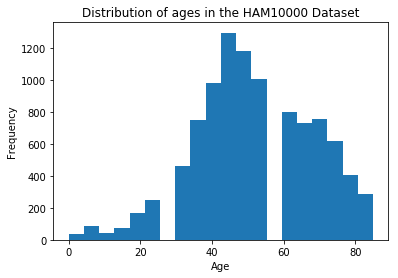

In [16]:
#Histogram
age.plot(kind='hist',bins=20)
plt.title('Distribution of ages in the HAM10000 Dataset')
plt.xlabel('Age')
plt.show()

It appears that patient age does not follow a normal distribution, and the data skews to the left with most of the patients being older than 40 years of age. This makes sense, since the risk for all types of cancer, including skin cancer, increases with age and is much higher for people older than 40 years than for those younger.

### Looking for relationships between age and other variables.

I wondered if patients in some categories were older than the others. Starting with **diagnosis**, below I made bar graphs showing the mean age for each type of condition to see if there are any differences.

dx
akiec    66.529052
bcc      66.828794
bkl      64.283747
df       53.043478
mel      60.679568
nv       46.477477
vasc     51.373239
Name: age, dtype: float64


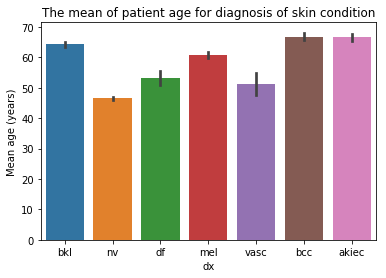

In [34]:
by_dx = data.groupby(data['dx']).mean()
by_dx_age = by_dx['age']
print(by_dx_age)

sns.barplot(x='dx', y='age', data=data)
plt.ylabel('Mean age (years)')
plt.title('The mean of patient age for diagnosis of skin condition')
plt.show()

It appears that patients with moles (nv), bruises (vasc), and dermatofibromas (df) have lower ages than others. This observation makes sense, since all of these are benign skin conditions whose incidence do not correlate with age. However, benign keratosis lesions (bkl), which is also a benign skin condition, do not demonstrate lower patient ages.

Next, I made bar graphs showing the mean age for each type of **diagnosis method** to see if there are any differences.

dx_type
confocal     64.202899
consensus    47.966002
follow_up    48.610961
histo        54.587397
Name: age, dtype: float64


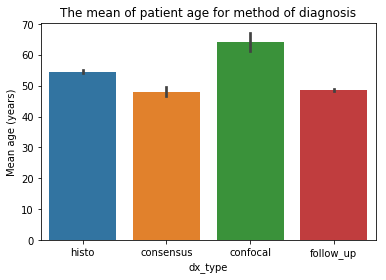

In [39]:
by_dx_type = data.groupby(data['dx_type']).mean()
by_dx_type_age = by_dx_type['age']
print(by_dx_type_age)

sns.barplot(x='dx_type', y='age', data=data)
plt.ylabel('Mean age (years)')
plt.title('The mean of patient age for method of diagnosis')
plt.show()

It appears that patients whose skin conditions are diagnosed using a confocal microscrope are significantly older than those who were diagnosed using other methods. There is no reason for this discrepancy, and this may be attributed to an accident.

Next, I made bar graphs showing the mean age for each **sex** to see if there are any differences.

sex
female    48.630608
male      54.534835
Name: age, dtype: float64


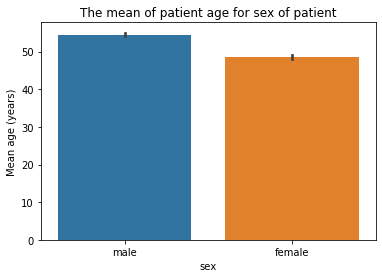

In [7]:
by_sex = data.groupby(data['sex']).mean()
by_sex_age = by_sex['age']
print(by_sex_age)

sns.barplot(x='sex', y='age', data=data)
plt.ylabel('Mean age (years)')
plt.title('The mean of patient age for sex of patient')
plt.show()

It appears that male patients are generally older than female ones.

Next, I made bar graphs showing the mean age for each **location of lesion** to see if there are any differences.

localization
abdomen            48.947111
acral              37.142857
back               52.522810
chest              53.432099
ear                55.982143
face               61.682369
foot               44.684543
genital            46.770833
hand               48.111111
lower extremity    50.746269
neck               53.660714
scalp              60.117188
trunk              49.387028
unknown            45.588235
upper extremity    53.606631
Name: age, dtype: float64


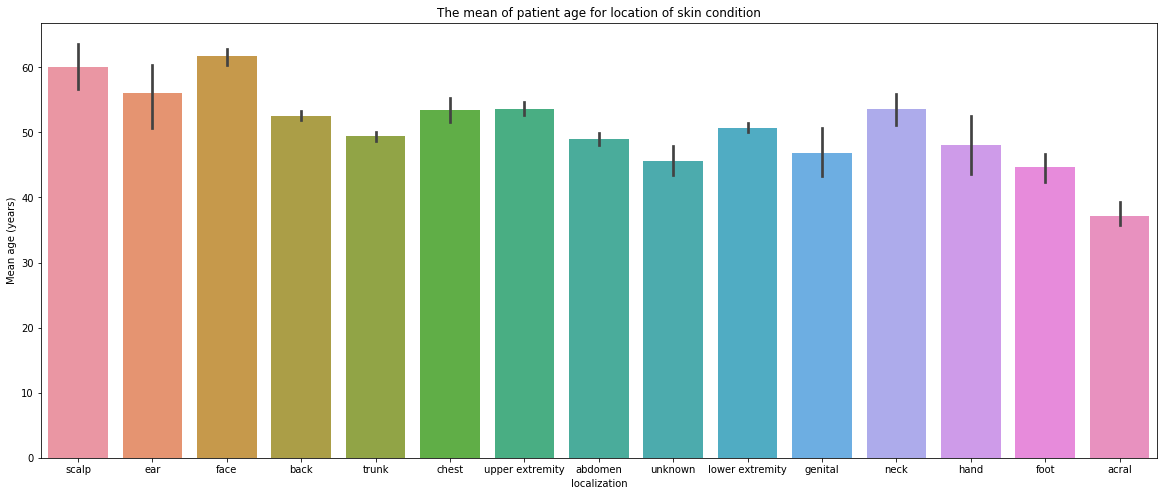

In [43]:
by_localization = data.groupby(data['localization']).mean()
by_localization_age = by_localization['age']
print(by_localization_age)

plt.figure(figsize=(20,8))

sns.barplot(x='localization', y='age', data=data)
plt.ylabel('Mean age (years)')
plt.title('The mean of patient age for location of skin condition')
plt.show()

Generally, the standard deviations for the locations were much wider than those of previous categories. Overall most ages were around 50 years, but patients whose condition was on the scalp and face tended to be older (around 60 years old) while those with conditions in the foot, unknown, or acral regions tended to be younger (around 45 years old).